# [**0 - 1 Knapsack Problem**](https://practice.geeksforgeeks.org/problems/0-1-knapsack-problem0945/1)

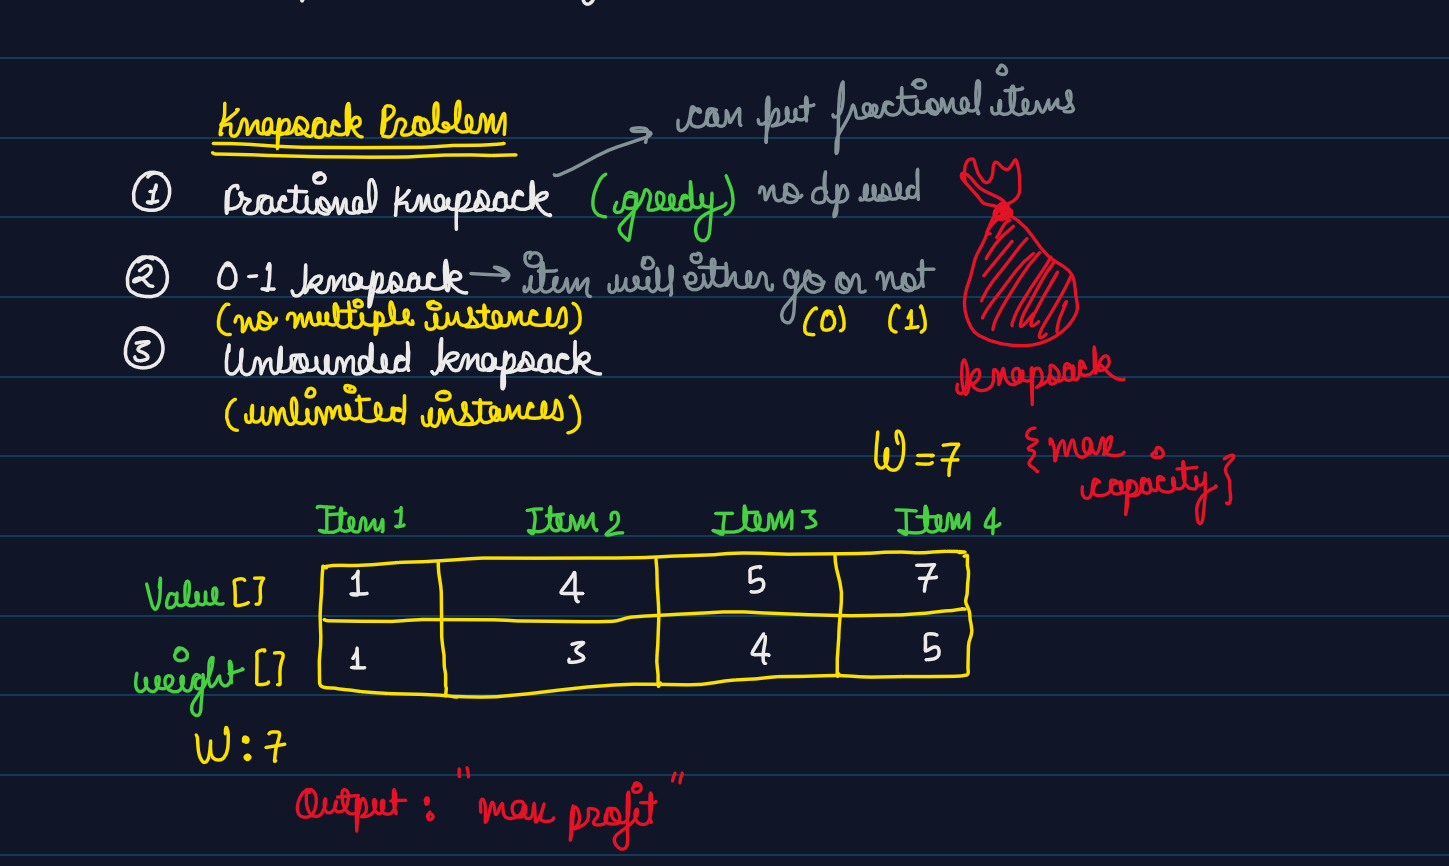

# Recursive

In [1]:
class Solution:
    
    #Function to return max value that can be put in knapsack of capacity W.
    def knapSack(self,W, wt, val, n):
       
        if n==0 or W==0:
            max_profit= 0
            return max_profit
        
        if wt[n-1]>W:
            # can't include in knapsack
            max_profit= self.knapSack(W, wt, val, n-1)
            return max_profit
        else:
            max_profit= max(
                self.knapSack(W, wt, val, n-1), # don't include
                val[n-1]+self.knapSack(W-wt[n-1], wt, val, n-1) # include 
            )
            return max_profit

        

# Memoization

In [40]:
class Solution:
    
    #Function to return max value that can be put in knapsack of capacity W.
    def knapSack(self,W, wt, val, n, isFirst=True):

        if isFirst:
            # self.t= [[False]*(W+1)]*(n+1) # no idea why this doesn't work
            # self.t= [[-1 for i in range(W + 1)] for j in range(n + 1)]
            self.t= [[ False for i in range(W + 1)] for j in range(n + 1)]
            # return self.t1==self.t2
            
       
        if n==0 or W==0:
            max_profit= 0
            return max_profit
        

        if self.t[n][W]:
            # print(self.t[n][W])
            return self.t[n][W]
        
        if wt[n-1]>W:
            # can't include in knapsack
            max_profit= self.knapSack(W, wt, val, n-1, isFirst=False)
            self.t[n][W]= max_profit
            return max_profit
        else:
            max_profit= max(
                self.knapSack(W, wt, val, n-1, isFirst=False), # don't include
                val[n-1]+self.knapSack(W-wt[n-1], wt, val, n-1, isFirst=False) # include 
            )
            self.t[n][W]= max_profit
            return max_profit


s= Solution()
        

In [41]:
N= 58
W= 41
values= "57 95 13 29 1 99 34 77 61 23 24 70 73 88 33 61 43 5 41 63 8 67 20 72 98 59 46 58 64 94 97 70 46 81 42 7 1 52 20 54 81 3 73 78 81 11 41 45 18 94 24 82 9 19 59 48 2 72"
weights= "83 84 85 76 13 87 2 23 33 82 79 100 88 85 91 78 83 44 4 50 11 68 90 88 73 83 46 16 7 35 76 31 40 49 65 2 18 47 55 38 75 58 86 77 96 94 82 92 10 86 54 49 65 44 77 22 81 52"

In [42]:
values= values.split(" ")
values= [int(i) for i in values]

weights= weights.split(" ")
weights= [int(i) for i in weights]


In [43]:
s.knapSack(W, weights, values, N)

223

# Bottom-Up approach

In [87]:
class Solution:
    
    #Function to return max value that can be put in knapsack of capacity W.
    def knapSack(self,W, wt, val, n, isFirst=True):

        if isFirst:
            # self.t= [[0]*(W+1)]*(n+1)
            # self.t= [[-1 for i in range(W + 1)] for j in range(n + 1)]
            self.t= [[ 0 for i in range(W + 1)] for j in range(n + 1)]
       
        # if n==0 or W==0:
        #     max_profit= 0
        #     return max_profit
        
        # for i in range(n+1):
        #     for j in range(W+1):
        #         self.t[i][j]=0
                
        
        

        # if self.t[n][W]:
        #     return self.t[n][W]
        
        # if wt[n-1]>W:
        #     # can't include in knapsack
        #     max_profit= self.knapSack(W, wt, val, n-1, isFirst=False)
        #     self.t[n][W]= max_profit
        #     return max_profit
        # else:
        #     max_profit= max(
        #         self.knapSack(W, wt, val, n-1, isFirst=False), # don't include
        #         val[n-1]+self.knapSack(W-wt[n-1], wt, val, n-1, isFirst=False) # include 
        #     )
        #     self.t[n][W]= max_profit
        #     return max_profit
        
        
        # i= n
        # j= W
        
        # print(self.t)
        for i in range(1, n+1):
            for j in range(1, W+1):
                if wt[i-1]>j:
                    # can't keep in the knapsack
                    max_profit= self.t[i-1][j]
                    self.t[i][j]= max_profit
                else:
                    max_profit= max(
                        self.t[i-1][j], # don't include in knapsack
                        val[i-1]+ self.t[i-1][j-wt[i-1]] # include in the knapsack
                        )
                    self.t[i][j]= max_profit
        # print(self.t)
        return self.t[-1][-1]

In [88]:
s= Solution()
N= 3
W= 4

values= "1 2 3"
weights="4 5 1" 

In [89]:
values= values.split(" ")
values= [int(i) for i in values]

weights= weights.split(" ")
weights= [int(i) for i in weights]


In [90]:
s.knapSack(W, weights, values, N)

1 (1, 4)
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 1], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
3 (3, 1)
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 3, 0, 0, 0]]
3 (3, 2)
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 3, 3, 0, 0]]
3 (3, 3)
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 3, 3, 3, 0]]
3 (3, 4)
[[0, 0, 0, 0, 0], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 3, 3, 3, 3]]
t= [[0, 0, 0, 0, 0], [0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 3, 3, 3, 3]]


3

In [10]:
W,n= 41, 58

In [12]:
l1= [[False]*(W+1)]*(n+1)

In [13]:
l2= [[ False for i in range(W + 1)] for j in range(n + 1)]


In [14]:
l1==l2

True